
# Project: Investigate a Dataset (No-show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This report will investigate "No-show appoinments" dataset. Which include information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

The question I am tring to answer about the dataset is:


How different attributes affect whether a patient will show up for their scheduled appointment?

In [2]:
# import statements 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [18]:
# Load  data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#inspect for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we see, all data is complete. No missing data :)

In [9]:
sum(df.duplicated())

0

No duplicates too :)

In [43]:
# check age column
df["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

some wrong ages as it seems !! -1 and 115 are not realistic.



### Data Cleaning (Data Types and Columns Names)

In [28]:
# 1 : Change "PatientId" to integer 
df.PatientId = df.PatientId.astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
# 2 : Rename some columns 
df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [34]:
# 3 : Change "ScheduledDay" and AppointmentDay data type to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [45]:
# 4 : Clean wrong ages
df = df[(df.Age >= 0) & (df.Age <= 95)]
df["Age"].describe()

count    110480.000000
mean         37.063342
std          23.079712
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          95.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question (How different attributes affect whether a patient will show up for their scheduled appointment?)

First, we will plot pie chart to see the proportion of missed appointments.

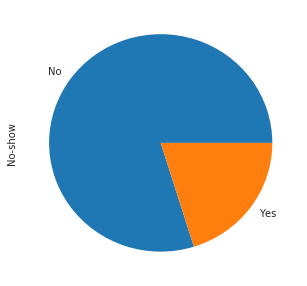

In [192]:
plt.figure(figsize=(5,5))
df["No-show"].value_counts().plot(kind="pie")

Next, will see how gender effects whether a patient will show to appointment:

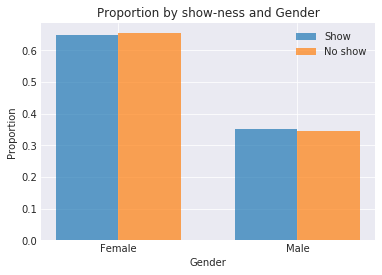

In [193]:

showup_counts = df.groupby(['No-show', 'Gender']).count()['PatientId']
showup_totals = df.groupby('No-show').count()['PatientId']
show_proportions = showup_counts['No'] / showup_totals['No']
noshow_proportions = showup_counts['Yes'] / showup_totals['Yes']
# plot bars
ind = np.arange(len(show_proportions))
width = 0.35
show_bars = plt.bar(ind, show_proportions, width, alpha=.7, label='Show')
noshow_bars = plt.bar(ind + width, noshow_proportions, width, alpha=.7, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.title('Proportion by show-ness and Gender')
locations = ind + width / 2  # xtick locations
labels = ["Female", "Male"]  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Now, we will see how whether if SMS was received will affect if a patient will show or not:

([<matplotlib.axis.XTick at 0x7f8960766f28>,
 <a list of 2 Text xticklabel objects>)

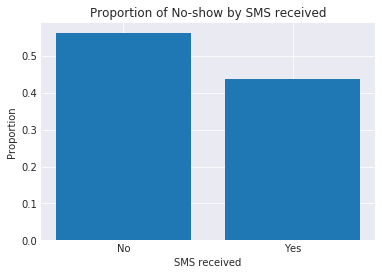

In [199]:
showup_counts = df.groupby(['No-show', 'SMS_received']).count()['PatientId']
showup_totals = df.groupby('No-show').count()['PatientId']
noshow_proportions = showup_counts['Yes'] / showup_totals['Yes']
# plot bars
noshow_bars = plt.bar([0,1], noshow_proportions, label='No show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('SMS received')
plt.title('Proportion of No-show by SMS received')
labels = ["No", "Yes"]  # xtick labels
plt.xticks([0,1], labels)



Let's investigate how age effects the probablility of No show:

Text(0.5,0,'Age')

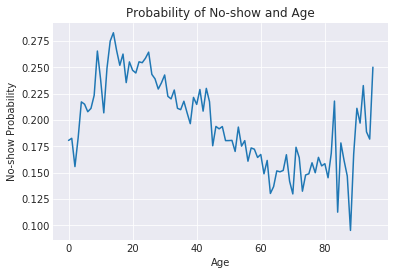

In [157]:
noshow_df = df[df["No-show"] == "Yes"]
age_probs = noshow_df.groupby("Age").count()["No-show"] / df.groupby("Age").count()["No-show"]
plt.plot(age_probs)
plt.title("Probability of No-show and Age")
plt.ylabel("No-show Probability")
plt.xlabel("Age")

Now, we will see how Scholarship, Hypertension, Diabetes, Alcoholism, Handicap affect No show of a patient:

In [170]:
Diabetes_probs = noshow_df.groupby("Diabetes").count()["No-show"] / df.groupby("Diabetes").count()["No-show"]
Diabetes_probs

Diabetes
0    0.203641
1    0.180169
Name: No-show, dtype: float64

In [172]:
Alcoholism_probs = noshow_df.groupby("Alcoholism").count()["No-show"] / df.groupby("Alcoholism").count()["No-show"]
Alcoholism_probs

Alcoholism
0    0.201970
1    0.201488
Name: No-show, dtype: float64

In [173]:
Hypertension_probs = noshow_df.groupby("Hypertension").count()["No-show"] / df.groupby("Hypertension").count()["No-show"]
Hypertension_probs

Hypertension
0    0.209048
1    0.173058
Name: No-show, dtype: float64

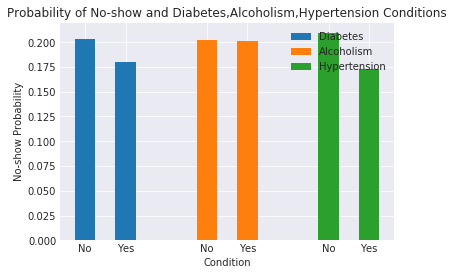

In [190]:
plt.bar([0,1] ,Diabetes_probs, width,label='Diabetes' )
plt.bar([3,4] ,Alcoholism_probs, width,label='Alcoholism' )
plt.bar([6,7] ,Hypertension_probs,width, label='Hypertension')
plt.title("Probability of No-show and Diabetes,Alcoholism,Hypertension Conditions")
plt.ylabel("No-show Probability")
plt.xlabel("Condition")
locations = [0,1,3,4,6,7]  # xtick locations
labels = ["No","Yes", "No","Yes" , "No","Yes"]  # xtick labels
plt.xticks(locations, labels)
plt.legend()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

to conclude, I found that it seems like around 20% of patients do not show for their appointments.
regarding the research question I posed, I found some interesing notes: 
1 : Female patients have a very slight tendency not to show for their appointments!
2 : Patients who recieve SMS are more usually do show to their appointments 
3 : Young Patients (around 8-18 years old) have more probability not to show to their appointments 
4 : Patients with Hypertension have less probability of not showing for their appointments 
5 : Patients with Diabetes have less probability of not showing for their appointments 
6 : Alcoholism have no clear relation with w showing for their appointments

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])